<a href="https://www.kaggle.com/code/ashadullah/electoral-bonds-deep-down-analysis?scriptVersionId=167193369" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/electoral-bonds/electroral_bonds_buyer_data.csv
/kaggle/input/electoral-bonds/electroral_bonds_receiver_data.csv


# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Table of Contents</p>

* **[1.The purpose of the project](#1)**

  - A simple definition of the idea of ​​the project
   
   
* **[2.Data features](#2)**

  - Definition of data features
  
  
* **[3.Importing libraries](#3)**  

   - Recall the most important libraries through which the project is completed
   
   
* **[4.Reading the data 📚](#4)**

   - This is an important step to get to know the data quickly and start organizing ideas
   
   
* **[5.Statistical information and general information about the data 🔍](#5)**

   - Data shape
   
   - Detect empty values
   
   - Statistical understanding of the data
   
   - Know the data types that will be dealt with
   
   - knowing the column names

* **[6.Data preprocessing 🔧](#7)** 

  - Finding and cleaning null values
  
  -  Delete duplicate data
  
  - Extract some information from some columns
  
  - Data encoding
  
  - Data correlations
  
 
   
* **[7.EDA 📊](#6)**

   - Knowledge of information through data and its representation in graphs
   
   - Know the parts that are not clear in the data in its normal form
   
   




<center>
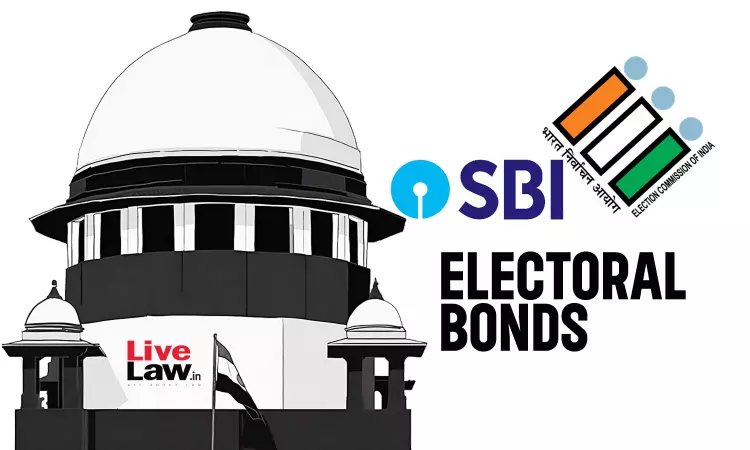</center>


<a id="1"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">The purpose of the project</p>

🔘 The goal of the project is deep analysis of The Election Commission of India (ECI) released the list of entities involved in the    sales and purchase of contentious **electoral bonds** on Thursday(14-03-2023). The ECI made the data public on its website following the Supreme Court's order. The top court on Tuesday had directed the Election Commission to publish details of the now-scrapped electoral bonds and political parties that redeemed them on Thursday. The State Bank of India (SBI) submitted the data on electoral bonds to the electoral panel body on 12 March after the SC rejected its plea to give the bank the more time to submit details. The SC in its February order gave a landmark judgement by scrapping the Electoral Bonds scheme. The court called it **“unconstitutional"**. here the deep down analysis lets empower the our citizen to get right info. and find answer and build logic to our data.

<a id="2"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Data features</p>


# **In 'electroral_bonds_buyer' Data-set containing**

🔘 **Date** : Date of the electrol bond purchase [Date of Purchase]

🔘 **Purchaser or Donator** : Name of the Purchaser [Name of the Purchaser]

🔘 **Amount** : The value/denomination of electrol bond [Denomination]

# **In 'electroral_bonds_receiver' Data-set containing**


🔘 **Date** : Date of the electrol bond encashment [Date ofEncashment]

🔘 **Political Party** : Name of the political party [Name of the Political Party]

🔘 **Amount** : The value/denomination of electrol bond [Denomination]




<a id="3"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Importing libraries</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-dark.mplstyle')
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from matplotlib.dates import DateFormatter

<a id="4"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Reading the data 📚</p>

🔘 We read the data through the Python Pandas library, in order to convert it into a data frame, and then facilitate analysis **(EDA)**

In [3]:
Donator = pd.read_csv(r'/kaggle/input/electoral-bonds/electroral_bonds_buyer_data.csv')

In [4]:
receiver = pd.read_csv(r'/kaggle/input/electoral-bonds/electroral_bonds_receiver_data.csv')

In [5]:
Donator.head()#show the first 5 rows

,Unnamed: 0,Date of Purchase,Purchaser Name,Denomination
0,0,12/Apr/2019,A B C INDIA LIMITED,100000
1,1,12/Apr/2019,A B C INDIA LIMITED,100000
2,2,12/Apr/2019,A B C INDIA LIMITED,1000000
3,3,12/Apr/2019,A B C INDIA LIMITED,1000000
4,4,12/Apr/2019,A B C INDIA LIMITED,100000


In [6]:
Donator.tail()#show the last 5 rows

,Unnamed: 0,Date of Purchase,Purchaser Name,Denomination
18866,18866,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18867,18867,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18868,18868,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18869,18869,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000
18870,18870,11/Jan/2024,WESTWELL GASES PRIVATE LIMITED,10000000


In [7]:
receiver.head()

,Unnamed: 0,Date of\nEncashment,Name of the Political Party,Denomination
0,0,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
1,1,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
2,2,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,10000000
3,3,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000
4,4,12/Apr/2019,ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM,1000000


In [8]:
receiver.tail()

,Unnamed: 0,Date of\nEncashment,Name of the Political Party,Denomination
20416,20416,24/Jan/2024,JANASENA PARTY,1000000
20417,20417,24/Jan/2024,JANASENA PARTY,1000000
20418,20418,24/Jan/2024,JANASENA PARTY,1000000
20419,20419,24/Jan/2024,JANASENA PARTY,1000000
20420,20420,24/Jan/2024,JANASENA PARTY,1000000


<a id="5"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">Statistical information and general information about the data 🔍</p>

In [9]:
Donator.shape

(18871, 4)

In [10]:
receiver.shape

(20421, 4)

**<p style="color:red">Observations 📋</p>**

🔘 Donator data consisting of **18871 rows** and **4 columns** (features)

🔘 Receiver data consisting of **20421 rows** and **4 columns** (features)

In [11]:
Donator.drop(columns = ['Unnamed: 0'],inplace=True)

In [12]:
receiver.drop(columns = ['Unnamed: 0'],inplace=True)

In [13]:
Donator.describe().style.background_gradient(cmap='Reds')

,Denomination
count,18871.000000
mean,6441372.052355
std,4538946.881625
min,1000.000000
25%,1000000.000000
50%,10000000.000000
75%,10000000.000000
max,10000000.000000


In [14]:
receiver.describe().style.background_gradient(cmap='Reds')

,Denomination
count,20421.000000
mean,6252920.669899
std,4576321.214390
min,1000.000000
25%,1000000.000000
50%,10000000.000000
75%,10000000.000000
max,10000000.000000


**<p style="color:red">Observations 📋</p>**

🔘 The data is less divergent than the arithmetic mean relative to the target **(Denomination)** because The higher the standard deviation value, the greater the divergence of the data from the arithmetic mean, and the smaller the standard deviation, the less data from the arithmetic mean.

In [15]:
Donator.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18871 entries, 0 to 18870
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date of Purchase  18871 non-null  object
 1   Purchaser Name    18871 non-null  object
 2   Denomination      18871 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 442.4+ KB


In [16]:
Donator.columns

Index(['Date of Purchase', 'Purchaser Name', 'Denomination'], dtype='object')

In [17]:
receiver.info

<bound method DataFrame.info of       Date of\nEncashment               Name of the Political Party  \
0             12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
1             12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
2             12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
3             12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
4             12/Apr/2019  ALL INDIA ANNA DRAVIDA MUNNETRA KAZHAGAM   
...                   ...                                       ...   
20416         24/Jan/2024                            JANASENA PARTY   
20417         24/Jan/2024                            JANASENA PARTY   
20418         24/Jan/2024                            JANASENA PARTY   
20419         24/Jan/2024                            JANASENA PARTY   
20420         24/Jan/2024                            JANASENA PARTY   

       Denomination  
0           1000000  
1           1000000  
2          10000000  
3           1000000  
4    

In [18]:
receiver.columns

Index(['Date of\nEncashment', 'Name of the Political Party', 'Denomination'], dtype='object')

<a id="6"></a>
# <p style="padding:10px;background-color:#65939B ;margin:0;color:white;font-family:newtimeroman;font-size:100%;text-align:center;border-radius: 15px 50px;overflow:hidden;font-weight:500">EDA 📊</p>

🔘 **Exploratory data analysis (EDA)** : is used by data scientists to analyze and investigate data sets and summarize their main characteristics, often employing data visualization methods.

🔘 **check data unique values**

In [19]:
Donator.nunique()

Date of Purchase     146
Purchaser Name      1316
Denomination           5
dtype: int64

In [20]:
#Scale down the 'Denomination' column in the Donator DataFrame
Donator['Denomination'] = (Donator['Denomination'] // 1000) * 1000

# Scale down the 'Denomination' column in the Receiver DataFrame
receiver['Denomination'] = (receiver['Denomination'] // 1000) * 1000

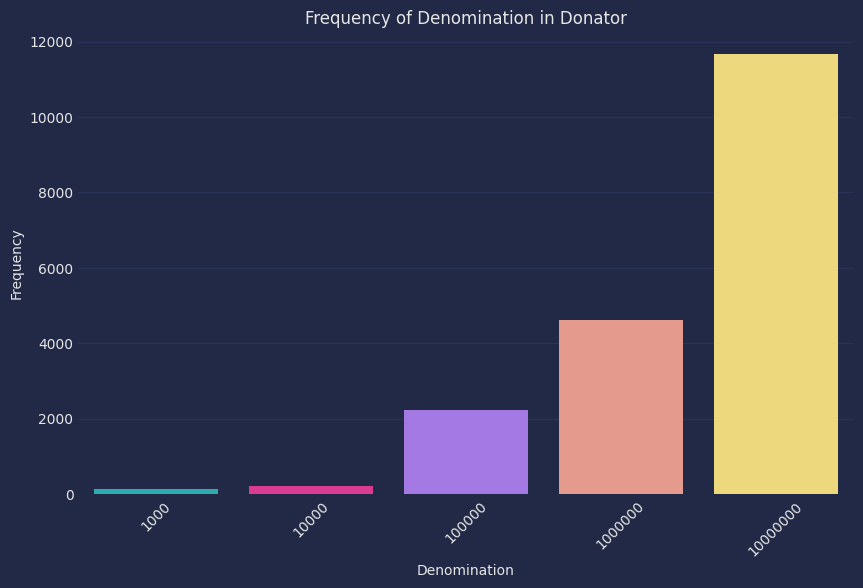

In [21]:
# Donator DataFrame EDA
plt.figure(figsize=(10, 6))
sns.countplot(data=Donator, x='Denomination')
plt.title('Frequency of Denomination in Donator')
plt.xlabel('Denomination')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

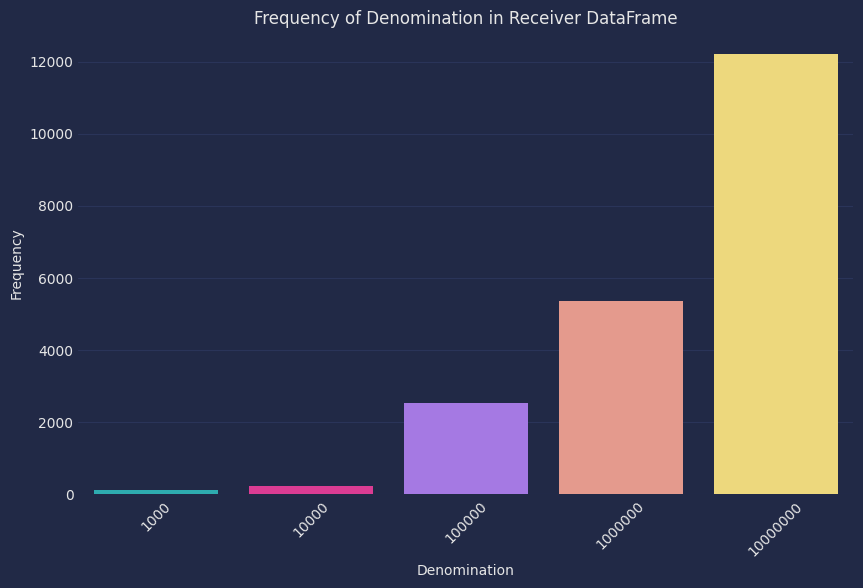

In [22]:
# Receiver DataFrame EDA
plt.figure(figsize=(10, 6))
sns.countplot(data=receiver, x='Denomination')
plt.title('Frequency of Denomination in Receiver DataFrame')
plt.xlabel('Denomination')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

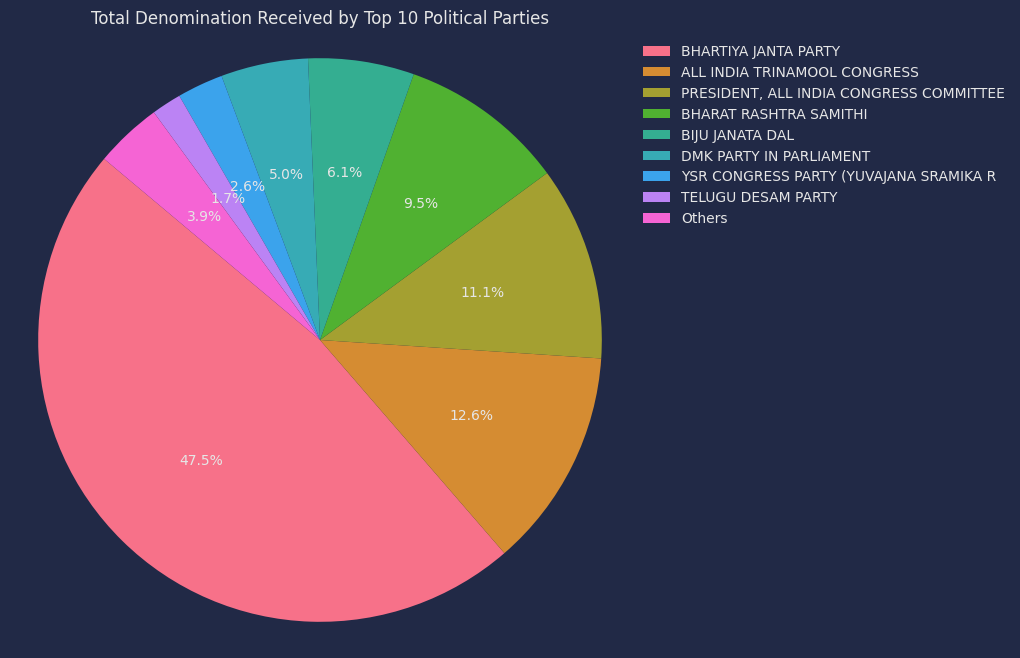

In [23]:
#Total denomination received by each political party in Receiver DataFrame
total_denomination_per_party = receiver.groupby('Name of the Political Party')['Denomination'].sum()

#Sorting the data in descending order of total denomination and selecting top 10 parties
top_10_denomination_per_party = total_denomination_per_party.sort_values(ascending=False).head(8)

#Summing up denominations of other parties
other_denomination = total_denomination_per_party.sort_values(ascending=False).tail(len(total_denomination_per_party) - 8).sum()

#Creating a DataFrame for top 10 parties and Others
top_10_and_others = pd.concat([top_10_denomination_per_party, pd.Series({'Others': other_denomination})])

#Plotting
plt.figure(figsize=(8, 8))
pie, _, _ = plt.pie(top_10_and_others, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("husl", 9))
plt.title('Total Denomination Received by Top 10 Political Parties')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

#Adding legend outside the pie chart
plt.legend(pie, top_10_and_others.index, bbox_to_anchor=(1, 1), loc='upper left')
plt.show()


In [24]:
pip install DateFormatter

ERROR: Could not find a version that satisfies the requirement DateFormatter (from versions: none)
ERROR: No matching distribution found for DateFormatter
Note: you may need to restart the kernel to use updated packages.


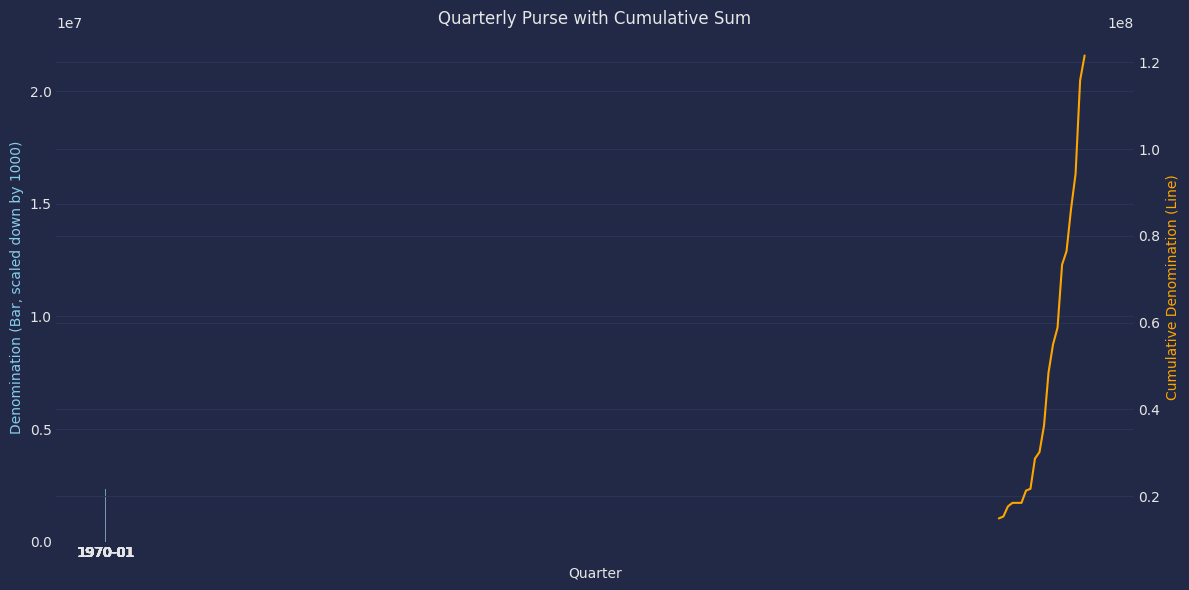

In [25]:
#Convert 'Date of Purchase' column to datetime format
Donator['Date of Purchase'] = pd.to_datetime(Donator['Date of Purchase'], format='%d/%b/%Y')

#Scale down the denominations by dividing by 1000
Donator['Denomination'] = Donator['Denomination'] / 1000

#Set 'Date of Purchase' as the index
Donator.set_index('Date of Purchase', inplace=True)

#Resample the data quarterly and sum the denominations
quarterly_total_denomination = Donator.resample('Q').sum()

#Calculate cumulative sum of denominations
quarterly_total_denomination['Cumulative Denomination'] = quarterly_total_denomination['Denomination'].cumsum()

#Plotting
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=quarterly_total_denomination, x=quarterly_total_denomination.index, y='Denomination', color='skyblue', alpha=0.7)
ax2 = ax.twinx()
sns.lineplot(data=quarterly_total_denomination, x=quarterly_total_denomination.index, y='Cumulative Denomination', color='orange', ax=ax2)
ax.set_xlabel('Quarter')
ax.set_ylabel('Denomination (Bar, scaled down by 1000)', color='skyblue')
ax2.set_ylabel('Cumulative Denomination (Line)', color='orange')
plt.title('Quarterly Purse with Cumulative Sum')

#Formatting date labels on x-axis
date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

plt.show()


# **I'm Still working on it till now if finding helpful**

# **Please upvote my work**

# **Thank you**